In [4]:
# electron-nucleus elastic scattering
# witten by Aswin
# 11 July 2020


#importing necessary packages
import numpy as np   #matrix manipulation
import scipy as sp   # scientific python
import matplotlib.pyplot as plt # visualization
from scipy.integrate import quad # integration
from scipy.special import expit




In [26]:
#fundamental constants 
# in natural units

h_= 1 #hbar
e = 0.303 #charge of electron


#***fn to plot form factor vs momentum transfer**#

#function arguments
#Z - atomic number
#d - diffusiveness of surface
#A - mass number
#num - resolution
#q_lim - upper boundary for momentum transfer 'q'

def plot(num,Z,d,A,q_lim):
    
    R = (1.18*(A**(1/3))-0.48) #half value radius in fermi -approximate relation
    
    #normalization constant of 
    #Woods-Saxon charge distribution
    
    wSax = lambda r: (r**2)/(1+expit((r-R)/d)) 
    wSax_integral,error = quad(wSax,0,np.inf)  #function call : quad - used for integration
    rho0 = Z/(4*np.pi*wSax_integral)  #normalization constant 
    
    
    #########################
    
    
    #plotting form factor vs momentum transfer
   
    integral = np.zeros(num)  # array of dimension 'num' initialized with 0
    
    
        
        


    for q in range(num):
        
        
        q = q%q_lim  # taking values of momentum transfer b/w 0 and q_lim
     
        #calculating fourier transform
        #of woods saxon distribution
    
    
        freal = lambda r :(1/Z*e)*np.cos(q*r/h_)*rho0*(1/(1+expit(r-R)/d))
    
        fimag = lambda r :1/(Z*e)*np.sin(q*r/h_)*rho0*(1/(1+expit((r-R)/d)))
    
        real_integral,error_real = quad(freal,0,30)
        imag_integral,error_imag = quad(fimag,0,30)

        
        integral[q] = 4*np.pi*np.sqrt(np.square(real_integral)+np.square(imag_integral))  # RHS is |F|
   
    
    
    q = np.linspace(0,num,num)

    plt.plot(q,integral,'r')    # momentum transfer vs form factor
    
    
    

  
    
    
    
    

/usr/lib/python3/dist-packages/ipykernel_launcher.py:25: IntegrationWarning: The integral is probably divergent, or slowly convergent.


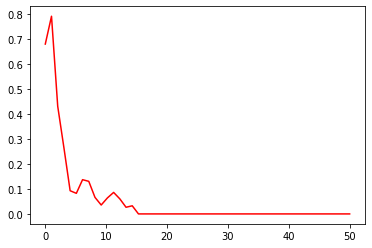

In [27]:
plot(50,8,0.513,32,15)